<html>
<h3>STATEMENT:</h3>
<p>
Study company dataset, explore it, and prepare a few figure (visualization) that either help to better understand the dataset at a briefly look or it show some interesting aspect which may be relevant for the company
</p>
<p>
    1.Data preparation
</p>
<p>
    2.Visualization and analysis
</p>
<p>
    3. Build a model to predict employees resignation
</p>
</html>

### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

### 1. DATA ACQUSITION AND PREPARATION

In [2]:
# import dataset
# data dataset is download from kaggle website
df_company = pd.read_csv('File/HR_comma_sep.csv')
# get number of columns and number of records
print('{} columns'.format(df_company.shape[1]))
print('{} records'.format(df_company.shape[0]))

10 columns
14999 records


#### 1. Get all columns name

In [3]:
df_company.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

#### 2. display the content of dataset (5 top records) 

In [4]:
df_company.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### 3. Rename columns for a best understanding of the dataset

In [5]:
df_company.rename(columns={'satisfaction_level': 'Satisfaction', 
                        'last_evaluation': 'Evaluation',
                        'number_project': 'Project Count',
                        'average_montly_hours': 'Average Monthly Hours',
                        'time_spend_company': 'Years At Company',
                        'Work_accident': 'Work Accident',
                        'promotion_last_5years': 'Promoted',
                        'sales' : 'Department',
                        'left' : 'Resigned'
                        },inplace=True)

#### 4. Get dataset information to verify if there is missing values

In [6]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
Satisfaction             14999 non-null float64
Evaluation               14999 non-null float64
Project Count            14999 non-null int64
Average Monthly Hours    14999 non-null int64
Years At Company         14999 non-null int64
Work Accident            14999 non-null int64
Resigned                 14999 non-null int64
Promoted                 14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### 5. Plot the boxplot to check if some attributes contains outliers

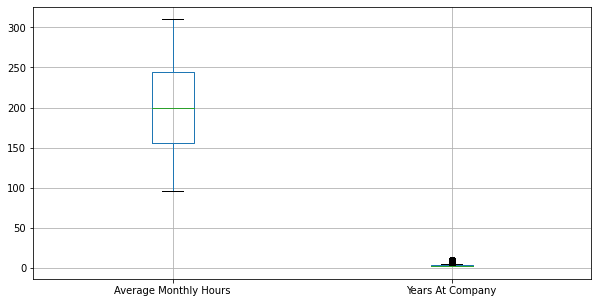

In [7]:
plt.figure(figsize=(10,5))
df_company[['Average Monthly Hours','Years At Company']].boxplot()
plt.show()

<html>
    <p>
        As we can see on the graph, there is no outlier present in the dataset
    </p>
</html>

#### 6. Description of columns having comtinues data

In [8]:
df_company[['Satisfaction','Evaluation','Project Count','Average Monthly Hours','Years At Company']].describe()

,Satisfaction,Evaluation,Project Count,Average Monthly Hours,Years At Company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [13]:
df_test = df_company[['Department','salary']]
df_test = pd.get_dummies(df_test,columns=['salary'])
df_test.rename(columns={'salary_high':'high','salary_low':'low','salary_medium':'medium'},inplace=True)
df_test.head()

,Department,high,low,medium
0,sales,0,1,0
1,sales,0,0,1
2,sales,0,0,1
3,sales,0,1,0
4,sales,0,1,0


In [17]:
dataTest = pd.DataFrame(df_test.groupby('Department')['high','low','medium'].sum())

In [19]:
dataTest

,high,low,medium
Department,,,
IT,83.0,609.0,535.0
RandD,51.0,364.0,372.0
accounting,74.0,358.0,335.0
hr,45.0,335.0,359.0
management,225.0,180.0,225.0
marketing,80.0,402.0,376.0
product_mng,68.0,451.0,383.0
sales,269.0,2099.0,1772.0
support,141.0,1146.0,942.0


In [23]:
dataTest.loc["IT"]['high']

83.0

### II. DATA VISUALIZATION

#### 1. Choose features for visualization and analysis

In [9]:
data_vis = df_company[['Satisfaction','Evaluation','Promoted','Years At Company','salary','Department','Resigned']]
data_vis = pd.get_dummies(data_vis,columns=['salary'])
data_vis.head()

,Satisfaction,Evaluation,Promoted,Years At Company,Department,Resigned,salary_high,salary_low,salary_medium
0,0.38,0.53,0,3,sales,1,0,1,0
1,0.80,0.86,0,6,sales,1,0,0,1
2,0.11,0.88,0,4,sales,1,0,0,1
3,0.72,0.87,0,5,sales,1,0,1,0
4,0.37,0.52,0,3,sales,1,0,1,0


#### 2. Employee distribution

In [10]:
emp_dist = pd.DataFrame(data_vis.groupby('Department')['Department'].count()
                       ).rename(columns={'Department':'Count'}).reset_index()
emp_dist

,Department,Count
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


In [11]:
total_per_salary = pd.DataFrame(data_vis.groupby('Department')['salary_high','salary_medium','salary_low'].sum(axis=0)
                       ).reset_index()
total_per_salary

,Department,salary_high,salary_medium,salary_low
0,IT,83,535,609
1,RandD,51,372,364
2,accounting,74,335,358
3,hr,45,359,335
4,management,225,225,180
5,marketing,80,376,402
6,product_mng,68,383,451
7,sales,269,1772,2099
8,support,141,942,1146
9,technical,201,1147,1372


In [12]:
print('high salary: {}'.format(total_per_salary['salary_high'].sum()))
print('medium salary: {}'.format(total_per_salary['salary_medium'].sum()))
print('low salary: {}'.format(total_per_salary['salary_low'].sum()))

high salary: 1237
medium salary: 6446
low salary: 7316


#### 2. Left employee distribution

In [13]:
# total left employee by department
left_emp = data_vis[data_vis['Resigned']==1]
left_emp_dist = pd.DataFrame(left_emp.groupby('Department')['Resigned'].sum(axis=0)).reset_index()
stat_left = left_emp_dist
stat_left['Total Employee'] = emp_dist['Count']
stat_left['percentage left (%)'] = round(stat_left['Resigned']*100/emp_dist['Count'],2)
stat_left = stat_left[['Department','Total Employee','Resigned','percentage left (%)']]
te =stat_left['Total Employee'].sum()
tr = stat_left['Resigned'].sum()
stat_left
#print('----------------------------------')
#print('Total Employee: {}, Total left: {}, percentage left: {}%'.format(te,tr,round(tr*100/te,2)))

,Department,Total Employee,Resigned,percentage left (%)
0,IT,1227,273,22.25
1,RandD,787,121,15.37
2,accounting,767,204,26.60
3,hr,739,215,29.09
4,management,630,91,14.44
5,marketing,858,203,23.66
6,product_mng,902,198,21.95
7,sales,4140,1014,24.49
8,support,2229,555,24.90
9,technical,2720,697,25.62


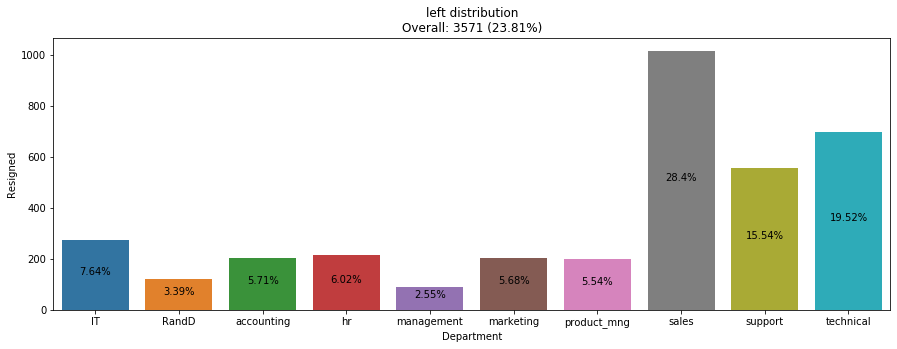

In [14]:
 #total left employee graph
plt.figure(figsize=(15,5))
sn.barplot(x=left_emp_dist['Department'],y=left_emp_dist['Resigned'],data = left_emp_dist)
plt.title('left distribution\nOverall: {} ({}%)'.format(left_emp_dist['Resigned'].sum()
                                                        ,round(left_emp_dist['Resigned'].sum()*100/14999,2)))
for index, row in left_emp_dist.iterrows():
    plt.text(index,row['Resigned']/2, str(round(row['Resigned']*100/sum(left_emp_dist['Resigned']),2))+'%', color='black', ha="center")

#### 3. base on salary classes

In [15]:
total_by_salary = pd.DataFrame(data_vis.groupby('Department')['salary_high','salary_medium','salary_low'].sum(axis=0))

In [16]:
by_salary = pd.DataFrame(left_emp.groupby('Department')['salary_high','salary_medium','salary_low'].sum(axis=0)).sort_values('salary_high',ascending=False)
by_salary

,salary_high,salary_medium,salary_low
Department,,,
technical,25,294,378
sales,14,303,697
marketing,9,68,126
support,8,158,389
hr,6,117,92
product_mng,6,87,105
accounting,5,100,99
IT,4,97,172
RandD,4,62,55


left employees distribution base on salary classes


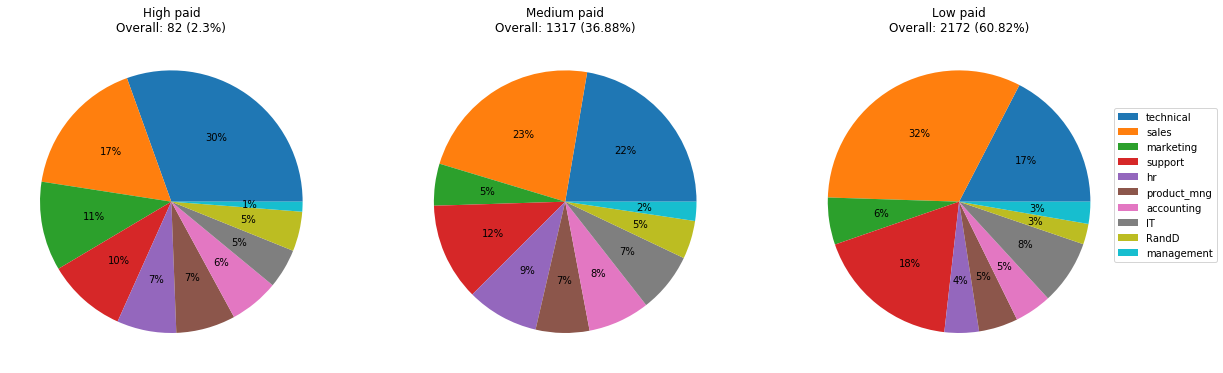

In [17]:
print('left employees distribution base on salary classes')
totAll_sal= by_salary['salary_high'].sum()+by_salary['salary_medium'].sum()+ by_salary['salary_low'].sum()
plt.figure(figsize=(20,9))
plt.subplots_adjust(hspace=.25)
plt.subplot(1,3,1)
plt.title('High paid\nOverall: {} ({}%)'.format(by_salary['salary_high'].sum(),round(by_salary['salary_high'].sum()*100/totAll_sal,2)))
plt.pie(by_salary['salary_high'],autopct='%1.0f%%')
plt.subplot(1,3,2)
plt.title('Medium paid\nOverall: {} ({}%)'.format(by_salary['salary_medium'].sum(),round(by_salary['salary_medium'].sum()*100/totAll_sal,2)))
plt.pie(by_salary['salary_medium'],autopct='%1.0f%%')
plt.subplot(1,3,3)
plt.title('Low paid\nOverall: {} ({}%)'.format(by_salary['salary_low'].sum(),round(by_salary['salary_low'].sum()*100/totAll_sal,2)))
plt.pie(by_salary['salary_low'],autopct='%1.0f%%')
plt.legend(by_salary.index,loc='upper right',bbox_to_anchor=(1.3,0.8))
plt.rcParams.update({'font.size':14})
plt.show()

<html>
    <p>
       The majority of Left employees are from low salary class. Only <b>2.3%</b> are highly paid.
        Sales, Support and Technical department are the most affected.
    </p>
</html>

#### 4. High evaluated employee left distribution : 

<html>
    <p>We are going to considere all evaluations between the <b>mean</b> and the <b>max</b> included as the high evaluated </p>
</html>

In [18]:
high_valuated_left = left_emp[left_emp['Evaluation']>=data_vis['Evaluation'].mean()]

In [19]:
high_valuated_left_dist = pd.DataFrame(high_valuated_left.groupby('Department')['salary_high','salary_medium','salary_low'].sum(axis=0)).sort_values('salary_high',ascending=False)
high_valuated_left_dist

,salary_high,salary_medium,salary_low
Department,,,
sales,10,156,352
technical,5,176,219
hr,3,50,41
support,3,98,200
IT,2,53,98
product_mng,2,43,65
RandD,1,41,31
accounting,1,52,46
management,1,22,29


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


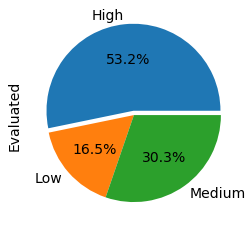

In [20]:
evaluation_class = left_emp
def eva(x):
    if x >= 0.71:
        return 'High'
    elif x >=0.5 and x <0.71:
        return 'Medium'
    else:
        return 'Low'
evaluation_class['Evaluated'] =evaluation_class['Evaluation'].apply(eva)
evaluation_class.groupby('Evaluated')['Evaluated'].count().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0,0))
plt.show()

#### Pie chart

High evaluated Left employees distribution -----------------------------------------------


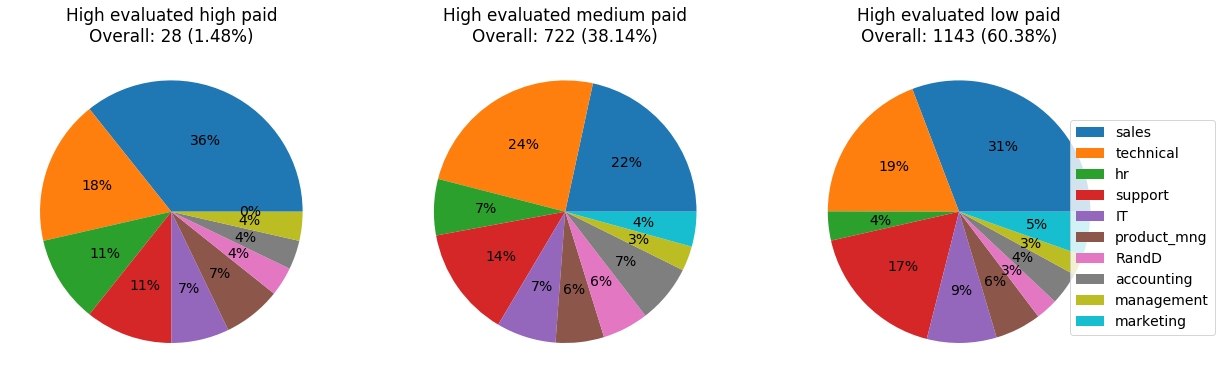

Total left: 3571, high evaluated: 1893 (53.01%)


In [22]:
sumH = high_valuated_left_dist['salary_high'].sum()
sumM = high_valuated_left_dist['salary_medium'].sum()
sumL = high_valuated_left_dist['salary_low'].sum()
sumTot = sumH + sumM + sumL
print('High evaluated Left employees distribution -----------------------------------------------')
plt.figure(figsize=(20,9))
plt.subplots_adjust(hspace=.25)
plt.subplot(1,3,1)
plt.title('High evaluated high paid\nOverall: {} ({}%)'.format(sumH,round(sumH*100/sumTot,2)))
plt.pie(high_valuated_left_dist['salary_high'],autopct='%1.0f%%')
plt.subplot(1,3,2)
plt.title('High evaluated medium paid\nOverall: {} ({}%)'.format(sumM,round(sumM*100/sumTot,2)))
plt.pie(high_valuated_left_dist['salary_medium'],autopct='%1.0f%%')
plt.subplot(1,3,3)
plt.title('High evaluated low paid\nOverall: {} ({}%)'.format(sumL,round(sumL*100/sumTot,2)))
plt.pie(high_valuated_left_dist['salary_low'],autopct='%1.0f%%')
plt.legend(high_valuated_left_dist.index,loc='upper right',bbox_to_anchor=(1.3,0.8))
plt.rcParams.update({'font.size':14})
plt.show()
a = left_emp_dist['Resigned'].sum()
print('Total left: {}, high evaluated: {} ({}%)'.format(a,sumTot,round(sumTot*100/a,2)))

<html>
    <p>
       53.01% of Left employees are very good workres<br> 
       The majority(60.38%) of Left very good workers are from low salary class. Only <b>1.48%</b> are highly paid.
        Sales, Support and Technical department are the most affected
    </p>
</html>

#### 5. Left Senior (5+ years) distribution

In [23]:
# at least 5 years spent in the company left
from_5_year = data_vis[(data_vis['Years At Company']>=5) &(data_vis['Resigned']==1)]
from_5_year_dept = pd.DataFrame(from_5_year.groupby('Department')['Department'].count()).rename(columns={'Department':'Count'})
print(from_5_year_dept)
a = left_emp_dist['Resigned'].sum()
b = from_5_year_dept['Count'].sum()
print('----------------------------------')
print('{} ({}%) over {} left employees who have spent at least 5 years experiences'.format(b,round(b*100/a,2),a))

             Count
Department        
IT              78
RandD           44
accounting      48
hr              49
management      18
marketing       59
product_mng     69
sales          288
support        179
technical      210
----------------------------------
1042 (29.18%) over 3571 left employees who have spent at least 5 years experiences


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


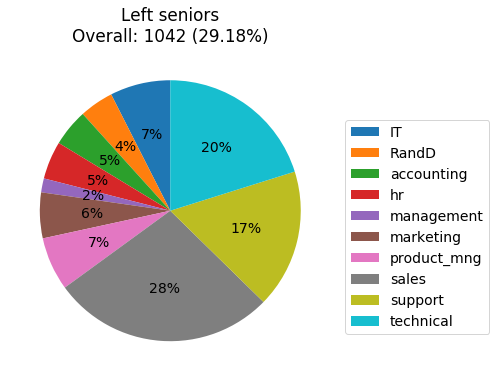

In [24]:
exp_per = from_5_year_dept['Count'].sum()
plt.figure(figsize=(8,6))
plt.pie(from_5_year_dept,autopct='%1.0f%%',startangle=90)
plt.title('Left seniors\nOverall: {} ({}%)'.format(exp_per,round(exp_per*100/a,2)))
plt.legend(from_5_year_dept.index,loc='upper right',bbox_to_anchor=(1.5,0.8))
plt.show()

#### 5.1 Overall seniors and Left senior

In [25]:
# all employee at least 5 years experience
all_emp_exp = data_vis[data_vis['Years At Company']>=5]
all_emp_exp_table = pd.DataFrame(all_emp_exp.groupby('Department')['Department'].count())
sumAll = all_emp_exp_table['Department'].sum()
print('All employee having at least 5 years experiences: {}'.format(sumAll))
print('{} ({}%) have left'.format(exp_per,round(exp_per*100/sumAll,2)))

All employee having at least 5 years experiences: 2755
1042 (37.82%) have left


#### 5.2 high evaluated Left seniors

In [26]:
high_E_promo =from_5_year[from_5_year['Evaluation']>=data_vis['Evaluation'].mean()]
left_HE_5=pd.DataFrame(high_E_promo.groupby('Department')['Department'].count()).rename(columns={'Department':'Count'})
c= left_HE_5['Count'].sum()
print(left_HE_5)
print('----------------------------------')
print('{} ({}% of {}) high evaluated Left Seniors'.format(c,round(c*100/b,2),b))

             Count
Department        
IT              76
RandD           41
accounting      43
hr              45
management      18
marketing       55
product_mng     69
sales          278
support        167
technical      200
----------------------------------
992 (95.2% of 1042) high evaluated Left Seniors


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


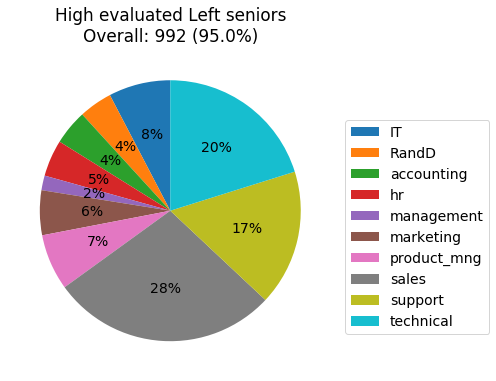

In [27]:
tot_left = left_HE_5['Count'].sum()
plt.figure(figsize=(8,6))
plt.pie(left_HE_5,autopct='%1.0f%%',startangle=90)
plt.title('High evaluated Left seniors\nOverall: {} ({}%)'.format(tot_left,round(tot_left*100/b)))
plt.legend(left_HE_5.index,loc='upper right',bbox_to_anchor=(1.5,0.8))
plt.show()

In [28]:
pd.DataFrame(high_E_promo[high_E_promo['Promoted']==1].groupby('Department')['salary_high','salary_medium','salary_low'].sum(axis=0)
            ).rename(columns={'Department':'Promoted'}).reset_index()

,Department,salary_high,salary_medium,salary_low
0,sales,0,1,0


<html>
<p>
    We can quote the lack of promotion as one of the reason of employee resignation. <b>992</b> total Good workers having at least 5 years experience left the company, only <b>1</b> from medium salary class has been promoted.   
</p>
<html>

#### 6. Summary

In [29]:
mean = data_vis['Evaluation'].mean()
senior_= data_vis[data_vis['Years At Company']>=5]
HighEvaluated = data_vis[data_vis['Evaluation']>=0.5]
HE_senior = HighEvaluated[HighEvaluated['Years At Company']>=5]
leftHe = HighEvaluated[HighEvaluated['Resigned']==1]
senior_left = senior_[senior_['Resigned']==1]
print('--------------- No evaluation Criteria -------------')
print('Total: {}'.format(data_vis.shape[0]))
print('Promoted: {}'.format(data_vis[data_vis['Promoted']==1].shape[0]))
print('Senior (5+ years): {}'.format(senior_.shape[0]))
print('Senior (5 + years) promoted: {}'.format(senior_[senior_['Promoted']==1].shape[0]))
print('Left: {}'.format(left_emp.shape[0]))
print('Left promoted: {}'.format(left_emp[left_emp['Promoted']==1].shape[0]))
print('Left Senior (5+ years): {}'.format(senior_left.shape[0]))
print('Left senior (5+ years) promoted: {}'.format(senior_left[senior_left['Promoted']==1].shape[0]))
print('--------------- High Evaluated ------------------')
print('Total: {}'.format(HighEvaluated.shape[0]))
print('Promoted: {}'.format(HighEvaluated[HighEvaluated['Promoted']==1].shape[0]))
print('Senior (5+ years): {}'.format(HE_senior.shape[0]))
print('Senior (5 + years) promoted: {}'.format(HE_senior[HE_senior['Promoted']==1].shape[0]))
print('Left: {}'.format(leftHe.shape[0]))
print('Left promoted: {}'.format(leftHe[leftHe['Promoted']==1].shape[0]))
print('Left Senior (5+ years): {}'.format(senior_left[senior_left['Evaluation']>=mean].shape[0]))
print('Left senior (5+ years) promoted: {}'.format(HE_senior[(HE_senior['Promoted']==1)&(HE_senior['Resigned']==1)].shape[0]))

--------------- No evaluation Criteria -------------
Total: 14999
Promoted: 319
Senior (5+ years): 2755
Senior (5 + years) promoted: 96
Left: 3571
Left promoted: 19
Left Senior (5+ years): 1042
Left senior (5+ years) promoted: 1
--------------- High Evaluated ------------------
Total: 13431
Promoted: 281
Senior (5+ years): 2493
Senior (5 + years) promoted: 75
Left: 2982
Left promoted: 14
Left Senior (5+ years): 992
Left senior (5+ years) promoted: 1


#### Some comparison between left and stayed employees

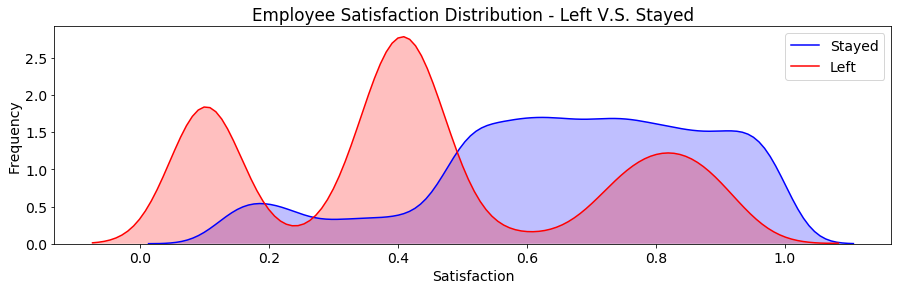

In [30]:
plt.figure(figsize=(15,4))
ax=sn.kdeplot(data_vis.loc[(data_vis['Resigned'] == 0),'Satisfaction'] , color='b',shade=True, label='Stayed')
ax=sn.kdeplot(data_vis.loc[(data_vis['Resigned'] == 1),'Satisfaction'] , color='r',shade=True, label='Left')
ax.set(xlabel='Satisfaction',ylabel='Frequency')
plt.title('Employee Satisfaction Distribution - Left V.S. Stayed')
plt.show()

In [30]:
Left_emp_satisf = left_emp[left_emp['Satisfaction']>=0.5].Resigned.count()
Stay_emp_satisf = data_vis[(data_vis['Resigned']==0)&(data_vis['Satisfaction']>=0.5)].Resigned.count()
total_satayed = data_vis[data_vis['Resigned']==0].Resigned.count()
total_left = left_emp_dist['Resigned'].sum()
print('-------------------------------------------------------------')
print("Left employees' satisfaction: {}%".format(round(Left_emp_satisf/total_left*100,2)))
print("stayd employees' satisfaction: {}%".format(round(Stay_emp_satisf/total_satayed*100,2)))

-------------------------------------------------------------
Left employees' satisfaction: 28.68%
stayd employees' satisfaction: 82.18%


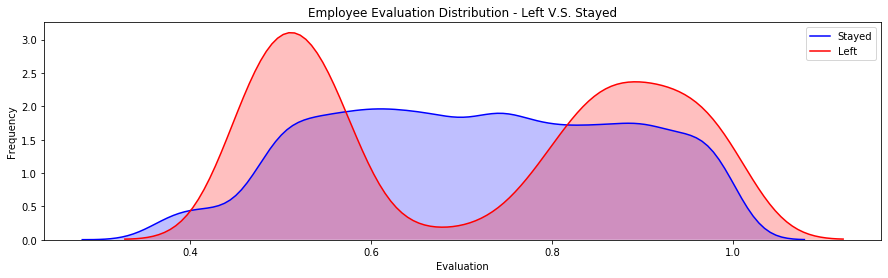

In [49]:
plt.figure(figsize=(15,4))
ax=sn.kdeplot(data_vis.loc[(data_vis['Resigned'] == 0),'Evaluation'] , color='b',shade=True, label='Stayed')
ax=sn.kdeplot(data_vis.loc[(data_vis['Resigned'] == 1),'Evaluation'] , color='r',shade=True, label='Left')
ax.set(xlabel='Evaluation',ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Left V.S. Stayed')
plt.show()

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


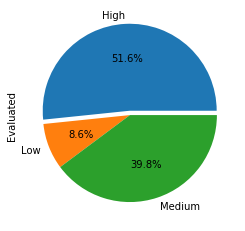

In [50]:
stayed_emp = data_vis[data_vis['Resigned']==0]
evaluation_class =stayed_emp
def eva(x):
    if x >= 0.71:
        return 'High'
    elif x >=0.5 and x <0.71:
        return 'Medium'
    else:
        return 'Low'
evaluation_class['Evaluated'] =evaluation_class['Evaluation'].apply(eva)
evaluation_class.groupby('Evaluated')['Evaluated'].count().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0,0))
plt.show()

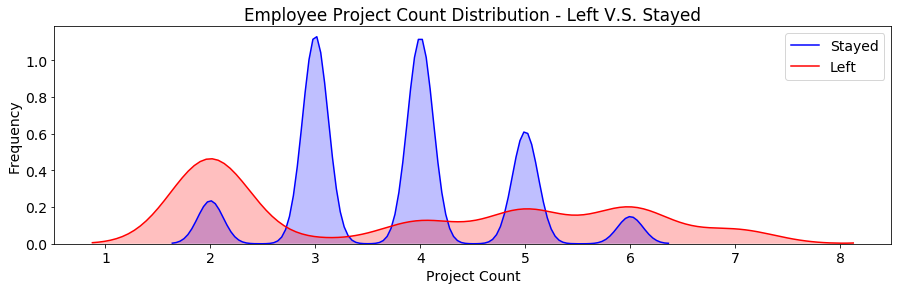

In [32]:
plt.figure(figsize=(15,4))
ax=sn.kdeplot(df_company.loc[(df_company['Resigned'] == 0),'Project Count'] , color='b',shade=True, label='Stayed')
ax=sn.kdeplot(df_company.loc[(df_company['Resigned'] == 1),'Project Count'] , color='r',shade=True, label='Left')
ax.set(xlabel='Project Count',ylabel='Frequency')
plt.title('Employee Project Count Distribution - Left V.S. Stayed')
plt.show()

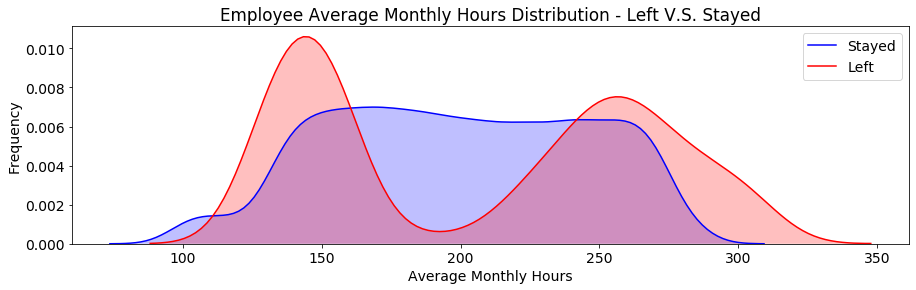

In [33]:
plt.figure(figsize=(15,4))
ax=sn.kdeplot(df_company.loc[(df_company['Resigned'] == 0),'Average Monthly Hours'] , color='b',shade=True, label='Stayed')
ax=sn.kdeplot(df_company.loc[(df_company['Resigned'] == 1),'Average Monthly Hours'] , color='r',shade=True, label='Left')
ax.set(xlabel='Average Monthly Hours',ylabel='Frequency')
plt.title('Employee Average Monthly Hours Distribution - Left V.S. Stayed')
plt.show()

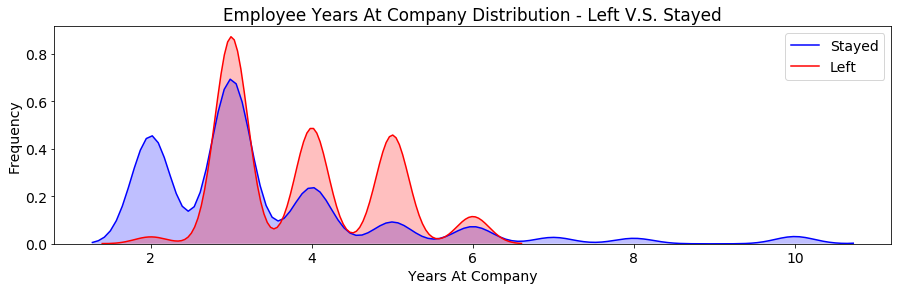

In [34]:
plt.figure(figsize=(15,4))
ax=sn.kdeplot(df_company.loc[(df_company['Resigned'] == 0),'Years At Company'] , color='b',shade=True, label='Stayed')
ax=sn.kdeplot(df_company.loc[(df_company['Resigned'] == 1),'Years At Company'] , color='r',shade=True, label='Left')
ax.set(xlabel='Years At Company',ylabel='Frequency')
plt.title('Employee Years At Company Distribution - Left V.S. Stayed')
plt.show()

### III. Machine Learning: Model to predict employee resignation

<html>
This model will help the company by applying prediction on new dataset, so that they could take some measures in order to prevent good worker's resignation.
</html>

#### 1. Import required libraries

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn import tree

#### 2. Transform categorical columns records into a numerical (label encoder)

In [38]:
le = LabelEncoder()
df_company['salary'] = le.fit_transform(df_company['salary'])
df_company['Department'] = le.fit_transform(df_company['Department'])

In [39]:
df_company.head()

,Satisfaction,Evaluation,Project Count,Average Monthly Hours,Years At Company,Work Accident,Resigned,Promoted,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


#### 3. Correlation

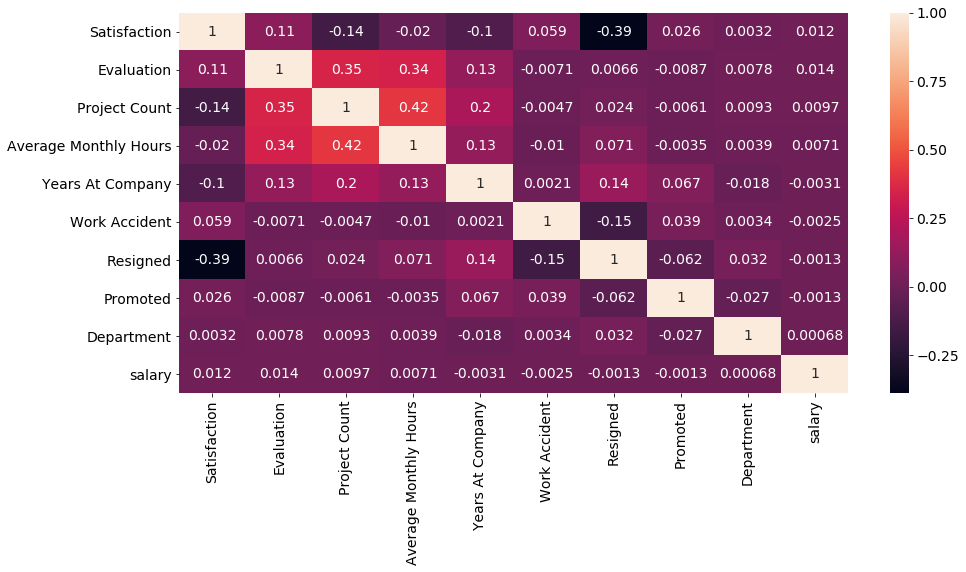

In [40]:
plt.figure(figsize=(15,7))
sn.heatmap(df_company.corr(),annot=True)
plt.rcParams.update({'font.size':10})
plt.show()

### H0: there is not relationship between features and response

In [43]:
smModel = sm.OLS(df_company['Resigned'],df_company.drop(columns=['Resigned'])).fit()

In [51]:
smModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Resigned   R-squared (uncentered):                   0.367
Model:                            OLS   Adj. R-squared (uncentered):              0.366
Method:                 Least Squares   F-statistic:                              964.2
Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
Time:                        01:18:03   Log-Likelihood:                         -7094.6
No. Observations:               14999   AIC:                                  1.421e+04
Df Residuals:                   14990   BIC:                                  1.428e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Satisfaction             -0.5541      0.012    -45.438      0.000      -0.578      -0.530
Evaluation                0.2387      0.020     12.205      0.000       0.200       0.277
Project Count            -0.0251      0.003     -8.478      0.000      -0.031      -0.019
Average Monthly Hours     0.0012   6.76e-05     17.182      0.000       0.001       0.001
Years At Company          0.0464      0.002     21.538      0.000       0.042       0.051
Work Accident            -0.1484      0.009    -16.425      0.000      -0.166      -0.131
Promoted                 -0.1555      0.022     -7.046      0.000      -0.199      -0.112
Department                0.0124      0.001     11.732      0.000       0.010       0.014
salary                    0.0357      0.005      7.405      0.000       0.026       0.045
==============================================================================
Omnibus:                     1457.116   Durbin-Watson:                   0.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1798.938
Skew:                           0.828   Prob(JB):                         0.00
Kurtosis:                       2.628   Cond. No.                     1.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### the H0 hypothesis is rejecte for all features because pvalues is more significant (pvalue <0.05)

#### 4. Defined features and label

In [36]:
x_features = df_company.drop(columns=['Resigned']).values
y_target = df_company['Resigned'].values

#### 5. data splitting into train and test

In [37]:
lr = LogisticRegression()
kf = KFold(n_splits=5, shuffle=True)

In [38]:
acc=0
for train_index,test_index in kf.split(x_features):
    xtrain,xtest = x_features[train_index],x_features[test_index]
    ytrain,ytest = y_target[train_index],y_target[test_index]
    lr.fit(xtrain,ytrain)
    ypred = lr.predict(xtest)
    accuracy = accuracy_score(ytest,ypred)
    if accuracy > acc:
        acc = accuracy
        save_train=train_index
        save_test = test_index
        x_train,x_test = xtrain,xtest
        y_train,y_test = ytrain,ytest

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [39]:
save_test

array([    2,     7,    16, ..., 14993, 14997, 14998])

In [40]:
save_train

array([    0,     1,     3, ..., 14994, 14995, 14996])

#### 6. GridSearch


In [41]:
criterion =['gini','entropy']
max_depth = [1,2,3,None]
splitter = ['best','random']
dt = DecisionTreeClassifier()
grid = GridSearchCV(estimator=dt,cv=5,param_grid=dict(criterion=criterion,max_depth=max_depth,splitter=splitter))

#### 7. fit the train data

In [42]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, None],
                      

In [43]:
# get the best parameters to instantiate our estimator DECISIONTREECLASSIFIER
grid.best_params_

{'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}

#### 8. instantiate the estimator

In [44]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=None,splitter='best')

#### 9. fit trains data

In [45]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### 10. Predict outcome

In [46]:
y_pred = dt.predict(x_test)

In [47]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### 11. verify the accuracy of the model

In [48]:
print(accuracy_score(y_test,y_pred))

0.9783333333333334


<html>
    <p>
        With 97% accuracy, the model will predict perfectly the employees resignation on new dataset.<br>
        this should help company to take some relatives action to maintain good worker.
    </p>
<html>

In [49]:
confusion_matrix(y_test,y_pred)

array([[2247,   48],
       [  17,  688]], dtype=int64)

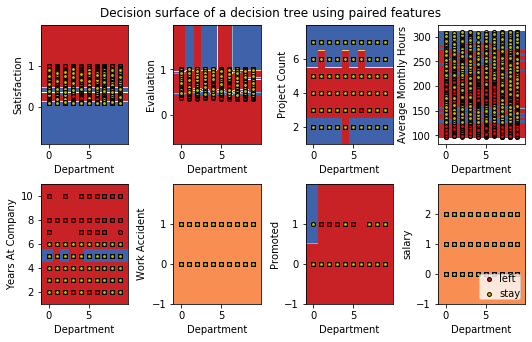

In [50]:
# Parameters

n_classes = 2
labels = ['left','stay']
plot_colors = "ryb"
plot_step = 0.02
data_test = df_company
features = data_test.drop(columns=['Resigned'])
target = data_test['Resigned']
features_x =features.values
target_y = target.values
plt.figure(figsize=(8,5))
for pairidx, pair in enumerate([[7, 0], [7, 1], [7, 2],
                                [7, 3], [7, 4], [7, 5],
                               [7,6],[7,8]]):
    # We only take the two corresponding features
    X = features_x[:, pair]
    y = target_y

    # Train
    clf = DecisionTreeClassifier(criterion='entropy',max_depth=None,splitter='best').fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 4, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(features.columns[pair[0]])
    plt.ylabel(features.columns[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=labels[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

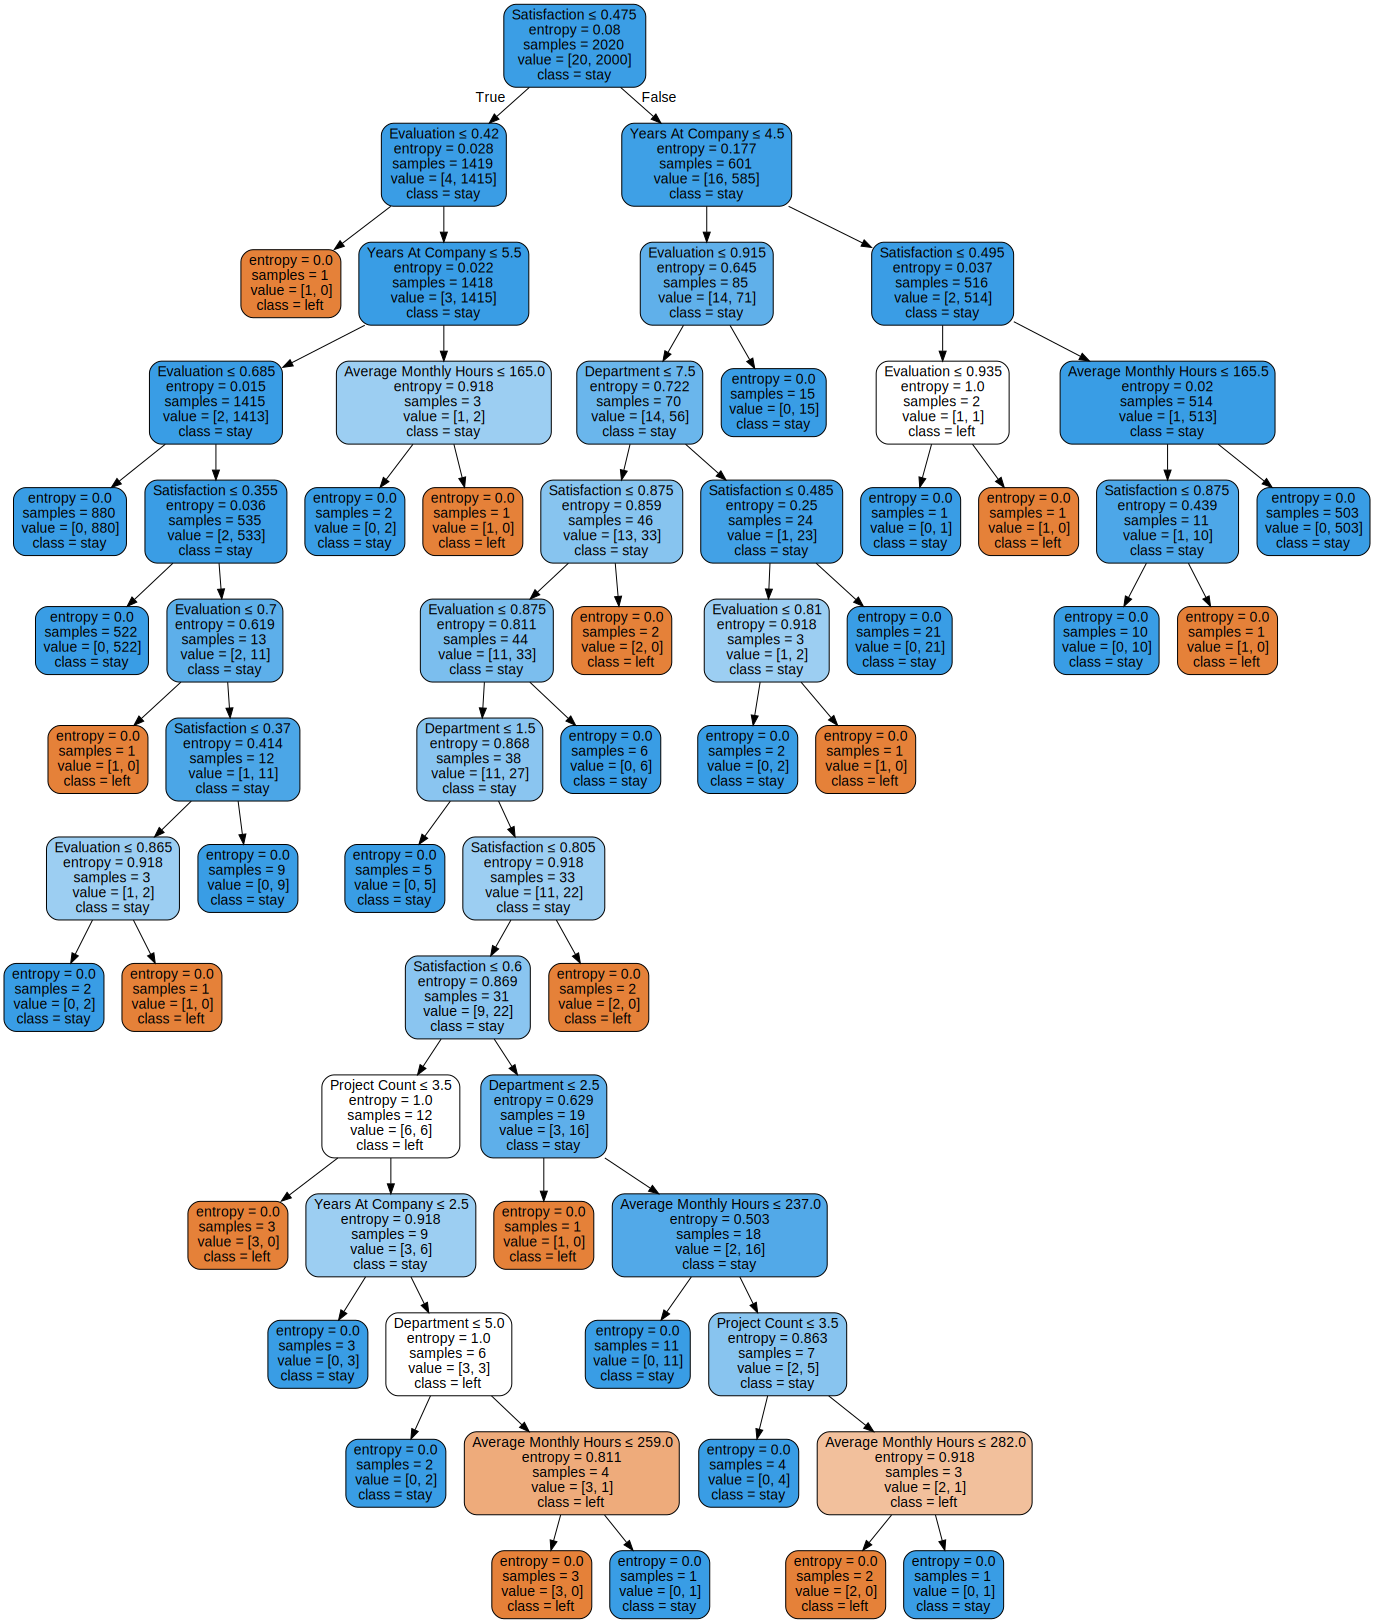

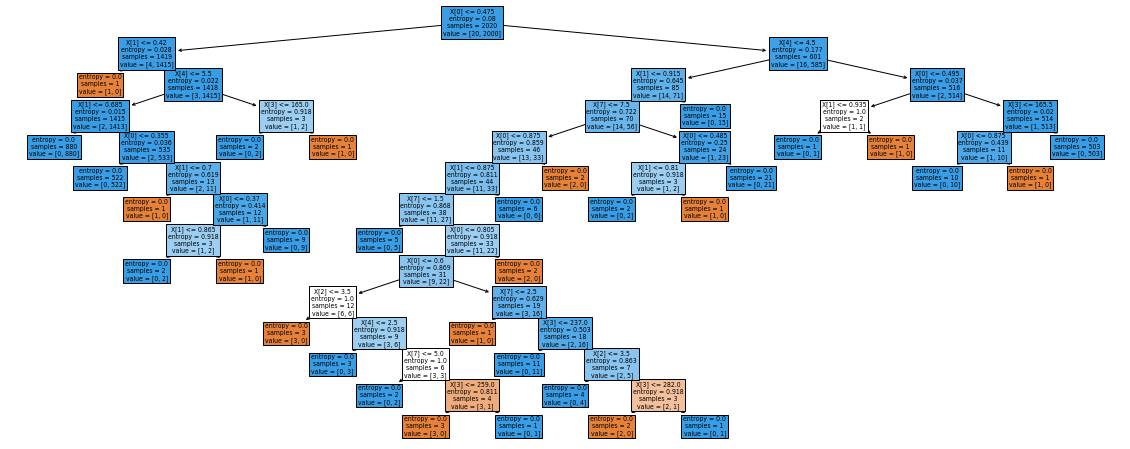

In [51]:
plt.figure(figsize=(20,8))
clf = DecisionTreeClassifier(criterion='entropy',max_depth=None,splitter='best').fit(features.iloc[:2020,:], target.iloc[:2020])
plot_tree(clf, filled=True)
import graphviz
dot_data = export_graphviz(clf, out_file=None, 
                      feature_names=features.columns,  
                     class_names=labels,  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [52]:
new_sample = df_company.sample(n=10000)

In [53]:
new_features = new_sample.drop(columns=['Resigned']).values
actual = new_sample['Resigned'].values

In [54]:
predicted = dt.predict(new_features)

In [55]:
print('actual - predicted')
for i in range(len(predicted)):
    print('{}-{}'.format(actual[i],predicted[i]))

actual - predicted
0-0
0-0
1-1
1-1
0-0
1-1
1-1
1-1
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
1-1
0-0
0-0
0-0
0-0
1-1
0-0
1-1
1-1
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
1-1
1-1
1-1
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
1-1
0-0
1-1
1-1
0-0
0-0
1-1
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
1-0
0-0
0-0
0-0
0-0
1-1
0-0
1-1
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
0-0
0-0
0-0
1-1
1-1
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
0-0
1-1
0-0
1-1
0-0
1-1
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
1-1
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
0-0
0-0
1-1
1-1
0-0
0-0
0-0
1-1
0-0
0-0
1-1
1-1
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-1
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
1-1
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0

0-0
1-1
0-0
0-0
0-0
0-0
1-1
0-0
1-0
1-1
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
1-1
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
1-1
1-1
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
0-0
0-0
0-0
1-1
0-0
1-1
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
0-0
0-0
1-1
0-0
1-1
0-0
1-1
1-1
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
1-1
1-1
0-0
1-1
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
1-1
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0


0-0
0-0
1-1
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
1-1
1-1
0-0
0-0
0-0
0-0
1-1
1-0
0-0
1-1
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
0-0
0-0
1-1
0-0
1-1
0-0
1-1
0-0
1-1
0-0
1-1
0-0
1-1
1-1
0-0
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
1-1
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
1-1
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
0-0
1-1
0-0
1-1
1-1
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
1-1
0-0
1-1
0-0
0-0
1-1
0-0
1-1
0-0
0-0
0-0
1-1
1-1
0-0
0-0
0-0
0-0
1-1
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
1-1
0-0
0-0
1-1
0-0


0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
1-1
1-1
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
0-0
0-0
1-1
1-1
1-1
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
1-1
0-0
0-0
0-0
1-1
1-1
0-0
0-0
1-1
0-0
0-0
1-1
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
1-1
1-1
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
1-1
1-1
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
1-1
0-0
1-1
1-1
1-1
1-0
0-0
0-0
1-1
0-0
1-1
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
0-0
0-0
1-1
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
1-1
1-1
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
1-1
0-0
0-0
1-1
1-1
1-1
1-1
0-0
1-1
1-1
1-1
0-0
1-1
0-0
0-0
0-0
0-0
1-1
1-1
0-0
0-0
1-1
0-0
1-1


0-0
0-0
0-0
0-0
0-0
1-1
1-1
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
1-1
1-1
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
1-1
1-1
1-1
0-0
0-0
0-0
0-0
0-0
1-1
1-1
1-1
0-0
0-0
1-1
1-1
0-0
1-1
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
1-1
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
0-0
0-0
1-1
0-0
0-0
1-1
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
0-0
1-1
0-0
1-1
0-0
0-0
0-0
0-0
0-0
1-1
0-0
1-1
0-0
0-0
0-0


In [56]:
accuracy_score(actual,predicted)

0.9962